In [1]:
import time
import sys
sys.path.append("..")

from src.data_loader import DataLoader
from src.models import model_parameters
import pandas as pd
pd.set_option('display.max_colwidth', None)

# Load dataset
dl = DataLoader(random_state=13)

# Due to the limited amount of memory and time available, choose models that you want to compare - uncomment the ones you want
print(f'All models: {list(model_parameters.keys())}')
models_to_compare = [
    'logistic_regression',
    'random_forest',
    'xgboost', 
    # 'light_gbm', 
    # 'catboost', 
    ]
models= {name: model_parameters[name] for name in models_to_compare}
models

All models: ['random_forest', 'xgboost', 'light_gbm', 'catboost', 'logistic_regression']


{'logistic_regression': {'model': <src.models.baseline_logistic_regression.LogisticRegressionModel at 0x1e02538f220>,
  'scaled': True},
 'random_forest': {'model': <src.models.ensemble_random_forest.RandomForestModel at 0x1e0228833d0>,
  'scaled': False},
 'xgboost': {'model': <src.models.ensemble_xgboost.XGBoostModel at 0x1e0252f85b0>,
  'scaled': False}}

Current model: logistic_regression
              precision    recall  f1-score   support

   Extrovert       0.95      0.93      0.94       296
   Introvert       0.90      0.92      0.91       207

    accuracy                           0.93       503
   macro avg       0.92      0.93      0.92       503
weighted avg       0.93      0.93      0.93       503



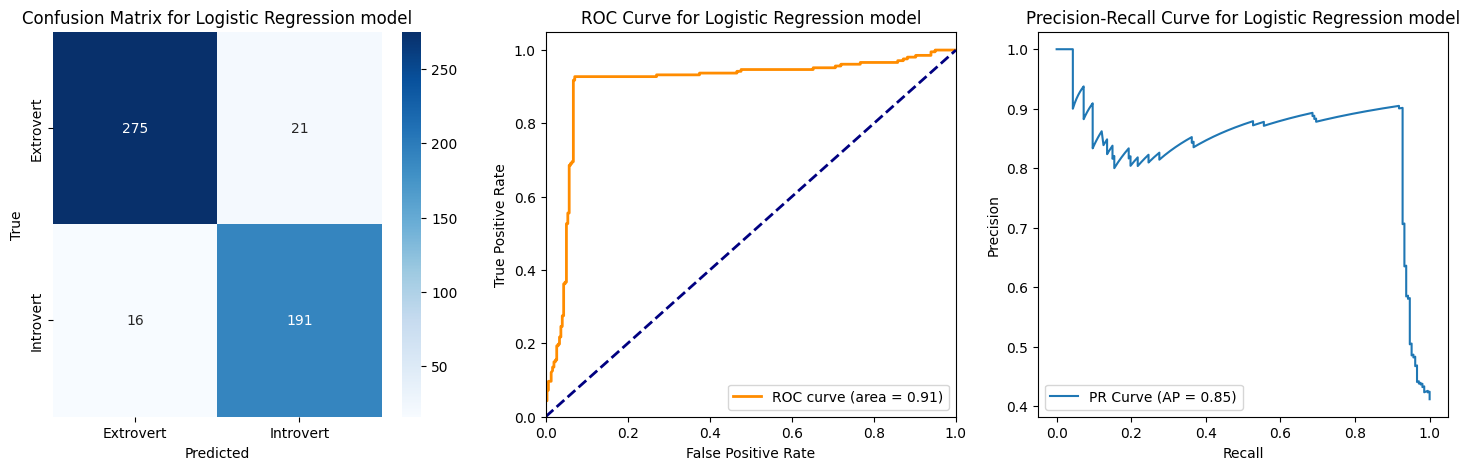

Time: 3.83 [s]
Current model: random_forest
              precision    recall  f1-score   support

   Extrovert       0.95      0.93      0.94       296
   Introvert       0.90      0.92      0.91       207

    accuracy                           0.93       503
   macro avg       0.92      0.93      0.92       503
weighted avg       0.93      0.93      0.93       503



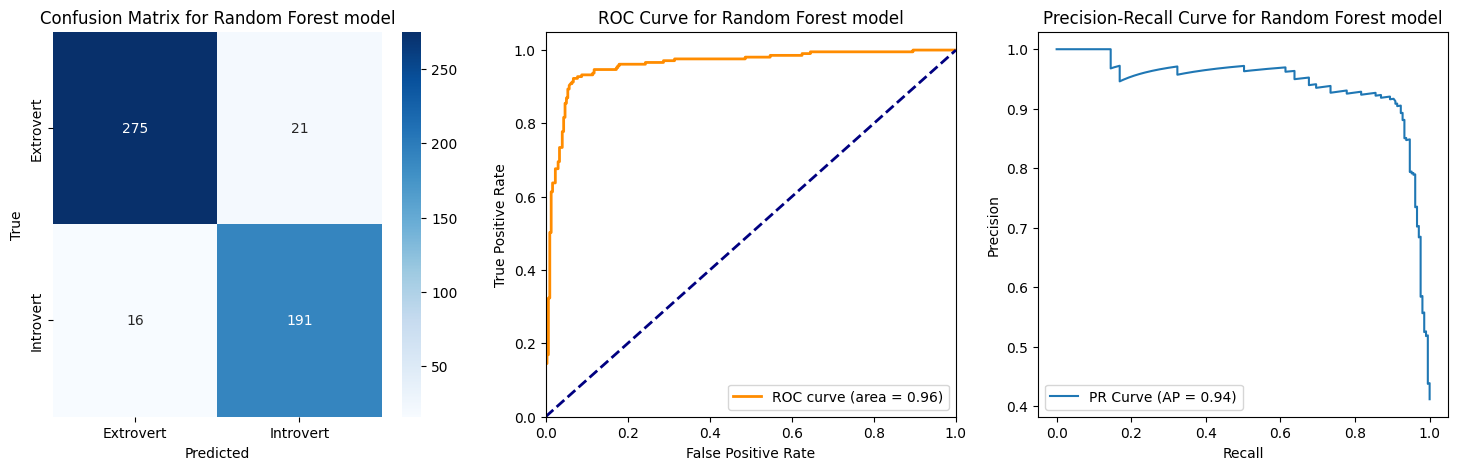

Time: 6.16 [s]
Current model: xgboost
              precision    recall  f1-score   support

   Extrovert       0.95      0.93      0.94       296
   Introvert       0.90      0.92      0.91       207

    accuracy                           0.93       503
   macro avg       0.92      0.93      0.92       503
weighted avg       0.93      0.93      0.93       503



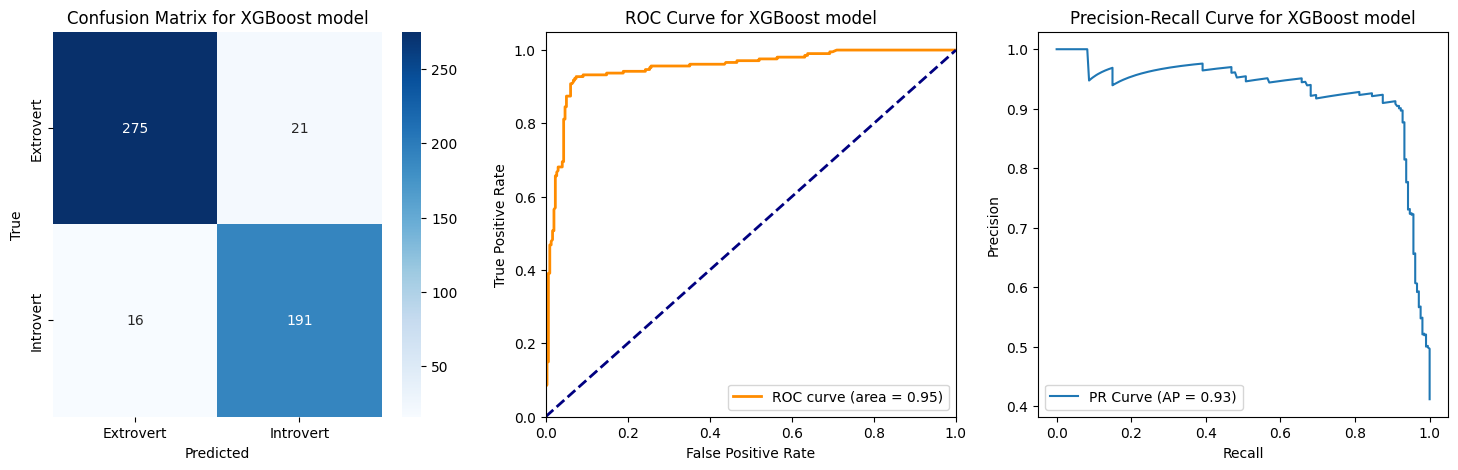

Time: 2.47 [s]


In [2]:
results = []
for name, config in models.items():
    print(f'Current model: {name}')
    X_train, X_test, y_train, y_test = dl.get_data_train_test(scaled=config['scaled'], test_size=0.2)

    model = config['model']
    t0 = time.time()
    model.train(X_train, y_train)
    metrics = model.evaluate(X_test, y_test, verbose = True)
    et = round(time.time() - t0, 2)
    results.append({
        'model': name,
        'execution_time': et,
        **metrics,
        'best_score': model.model.best_score_,
        'best_params': model.model.best_params_
    })
    print(f'Time: {et:.2f} [s]')
    print('=====================')

df_results = pd.DataFrame(results).sort_values(by=["accuracy", "auc", "ap"], ascending=False).reset_index(drop=True)

In [3]:
df_results

,model,execution_time,accuracy,auc,ap,best_score,best_params
0,random_forest,6.16,0.926441,0.958635,0.940690,0.92741,"{'n_estimators': 300, 'min_samples_split': 5, 'max_depth': 4}"
1,xgboost,2.47,0.926441,0.950671,0.929597,0.92741,"{'subsample': 0.5, 'n_estimators': 100, 'max_depth': 4, 'learning_rate': 0.01}"
2,logistic_regression,3.83,0.926441,0.905136,0.845801,0.92741,"{'solver': 'liblinear', 'C': 0.0001}"
